In [152]:
import csv
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

datafile = 'twitter_1000000.txt'
data_ = pd.read_csv(datafile,sep=' |\t|[|]',header=None,engine='python')
#print( data_ )
print('Data loaded')

Data loaded


In [153]:
# Put data in array (I hate pandas)
data = np.array(data_)
data = np.array(random.sample(data.tolist(),100000))
n = np.shape(data)[0]

<function matplotlib.pyplot.show>

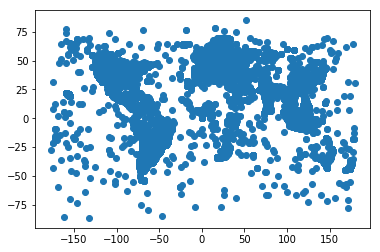

In [154]:
plt.scatter(data[:,1],data[:,2])
plt.show

In [157]:
K = 7

if K > n:
    print('K is too high ! __ K>n __')
if K == 1:
    print('Are you serious ? __ K=1 __')
if K == n:
    print('Are you serious ? __ K=n __')

<function matplotlib.pyplot.show>

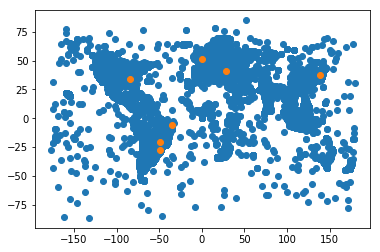

In [158]:
# Select initial centroids randomly 
centroids_cords = []
centroids = []
for i in range(K): 
    while True:
        c = random.randint(0,n-1)
        if not ( c in centroids ):
            centroids.append(c)
            centroids_cords.append( [data[c,1] , data[c,2]] )
            break;

# Print Result
cent_cords = np.array(centroids_cords)
plt.scatter(data[:,1],data[:,2])
plt.scatter(cent_cords[:,0],cent_cords[:,1])
plt.show


In [159]:
# Returns the order of the closest centroid (value between 0 and K-1)
#a: number of the point
#centroids_cords: array of the coords of the centroids
def closest_centroid(a,centroids_cords):
    closest = centroids_cords[0]
    d_ = (data[a,1] - closest[0])**2 + (data[a,2] - closest[1])**2
    closest = 0
    for i in range(1,K):
        d = (data[a,1] - centroids_cords[i][0])**2 + (data[a,2] - centroids_cords[i][1])**2
        if (d < d_) :
            d_ = d
            closest = i
    return closest

# CHECK REQUIRED IF SAME COORDS COEXIST            

In [160]:
# basic test
for k in range(K):
    if ( not ( closest_centroid(centroids[k],centroids_cords)  == k ) ):
        print ("test failed for the %d-th centroid !" % k)
print ("success !")
        

success !


In [161]:
while True:
    #FORM CLUSTERS
    
    # create empty clusters
    clusters = {}
    for i in range(K):
        clusters[i] = []
    
    # adding points to associated clusters
    for point in range(n):
        closest = closest_centroid(point,centroids_cords)
        if closest in clusters:
            clusters[closest].append(point)
        else:
            print('UnexpectedError: closest centroid not in centroids')
    
    # Recompute centroids
    new_centroids_cords = []
    for c in range(K):
        x = 0;
        y = 0;
        for i in clusters[c]:
            x += data[i,1]
            y += data[i,2]
        new_centroids_cords.append([ x/len(clusters[c]) , y/len(clusters[c]) ])
    
    if np.allclose(centroids_cords, new_centroids_cords, rtol=1e-03):
        break;
    centroids_cords = new_centroids_cords

print('TERMINATED !!!')
    

TERMINATED !!!


In [130]:
#clusters

{0: [5,
  20,
  22,
  26,
  31,
  32,
  36,
  40,
  41,
  42,
  43,
  44,
  47,
  50,
  52,
  53,
  62,
  65,
  77,
  83,
  85,
  96,
  99,
  103,
  106,
  108,
  125,
  127,
  138,
  139,
  141,
  142,
  143,
  146,
  147,
  148,
  149,
  159,
  169,
  173,
  178,
  182,
  183,
  184,
  186,
  187,
  189,
  190,
  201,
  203,
  207,
  208,
  210,
  211,
  213,
  214,
  215,
  216,
  220,
  222,
  229,
  241,
  242,
  243,
  250,
  254,
  255,
  264,
  268,
  273,
  279,
  280,
  285,
  287,
  291,
  294,
  296,
  300,
  303,
  307,
  317,
  323,
  324,
  327,
  328,
  332,
  334,
  336,
  340,
  346,
  350,
  351,
  357,
  358,
  359,
  360,
  365,
  366,
  374,
  375,
  376,
  378,
  380,
  381,
  390,
  392,
  394,
  397,
  400,
  401,
  404,
  408,
  421,
  428,
  429,
  431,
  435,
  441,
  442,
  443,
  444,
  451,
  457,
  463,
  464,
  469,
  475,
  476,
  479,
  480,
  489,
  493,
  494,
  501,
  503,
  510,
  511,
  512,
  513,
  519,
  527,
  528,
  532,
  533,
  536,
  538,

In [131]:
# The final centroids retrieved
print(new_centroids_cords)

[[122.90294595934407, 18.390472531483212], [3.4069475222820902, 48.341133665250538], [-92.131571885499554, 36.068364934997085], [34.220461582219791, 32.688979750636079], [-53.241005034606864, -20.149183131112636]]


<function matplotlib.pyplot.show>

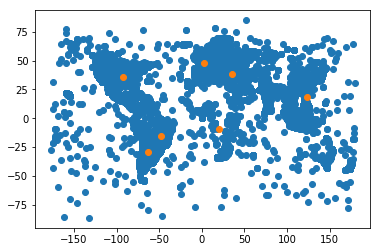

In [162]:
n_cent_cords = np.array(new_centroids_cords)
plt.scatter(data[:,1],data[:,2])
plt.scatter(n_cent_cords[:,0],n_cent_cords[:,1])
plt.show